In [1]:
import os
import glob
import numpy as np
import pandas as pd
import configparser
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from astropy.modeling.models import Lorentz1D
from astropy.time import Time
from astropy import units as u
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS, LSR
from astropy.time import Time
from astropy.constants import c

In [2]:
def read_file(path,name,obstime):
    f = open(path+name,'rb')
    xx = f.read()
    f.close()
    
    septrum = np.frombuffer(xx,np.float32)
    septrum = np.sum( septrum.reshape(obstime,int(len(septrum)/obstime)),axis=0 )/obstime
    
    fig = plt.figure(figsize=(14,9))
    plt.plot(septrum)
    plt.show()
    
    return septrum

def read_pathfile(pathname,obstime):
    f = open(pathname,'rb')
    xx = f.read()
    f.close()
    
    septrum = np.frombuffer(xx,np.float32)
    septrum = np.sum( septrum.reshape(obstime,int(len(septrum)/obstime)),axis=0 )/obstime
    
    #fig = plt.figure(figsize=(14,9))
    #plt.plot(septrum)
    #plt.show()
    
    return septrum

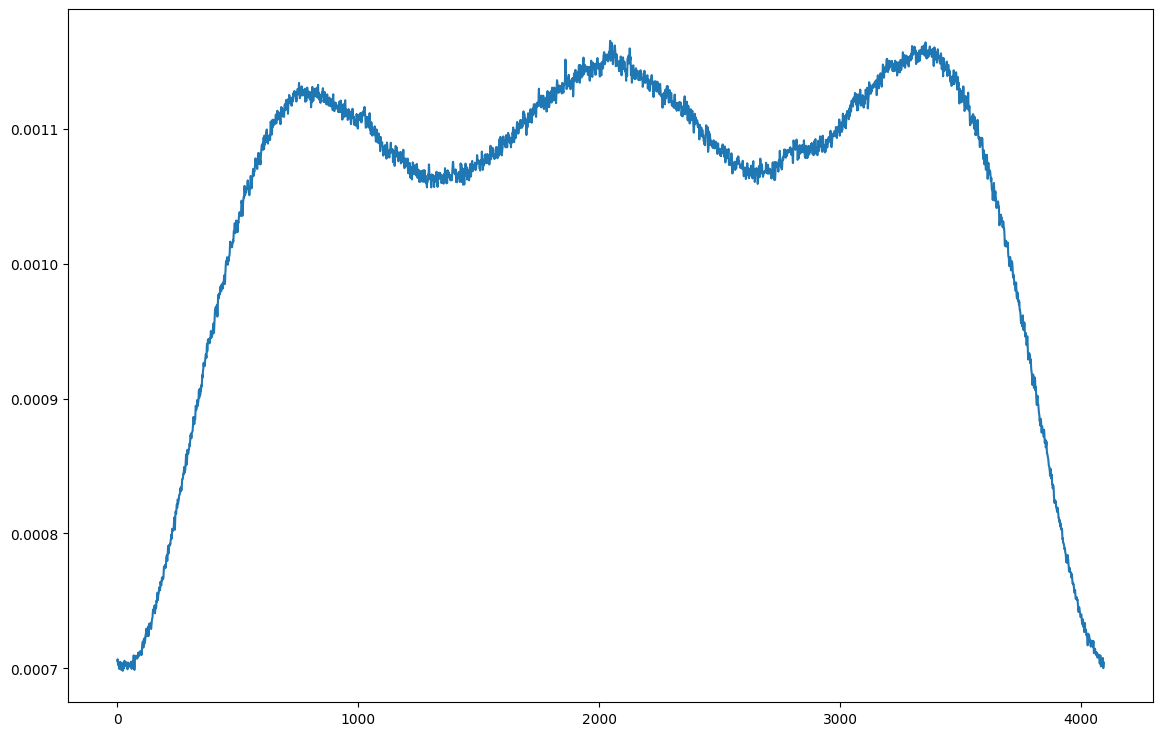

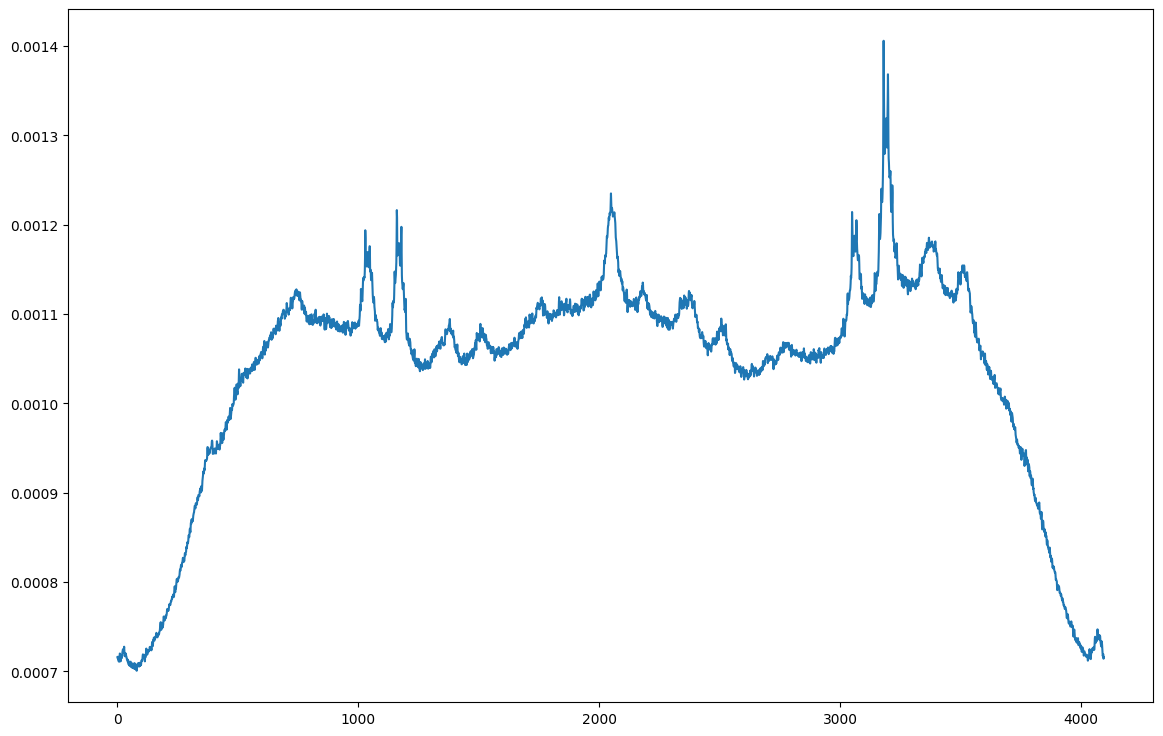

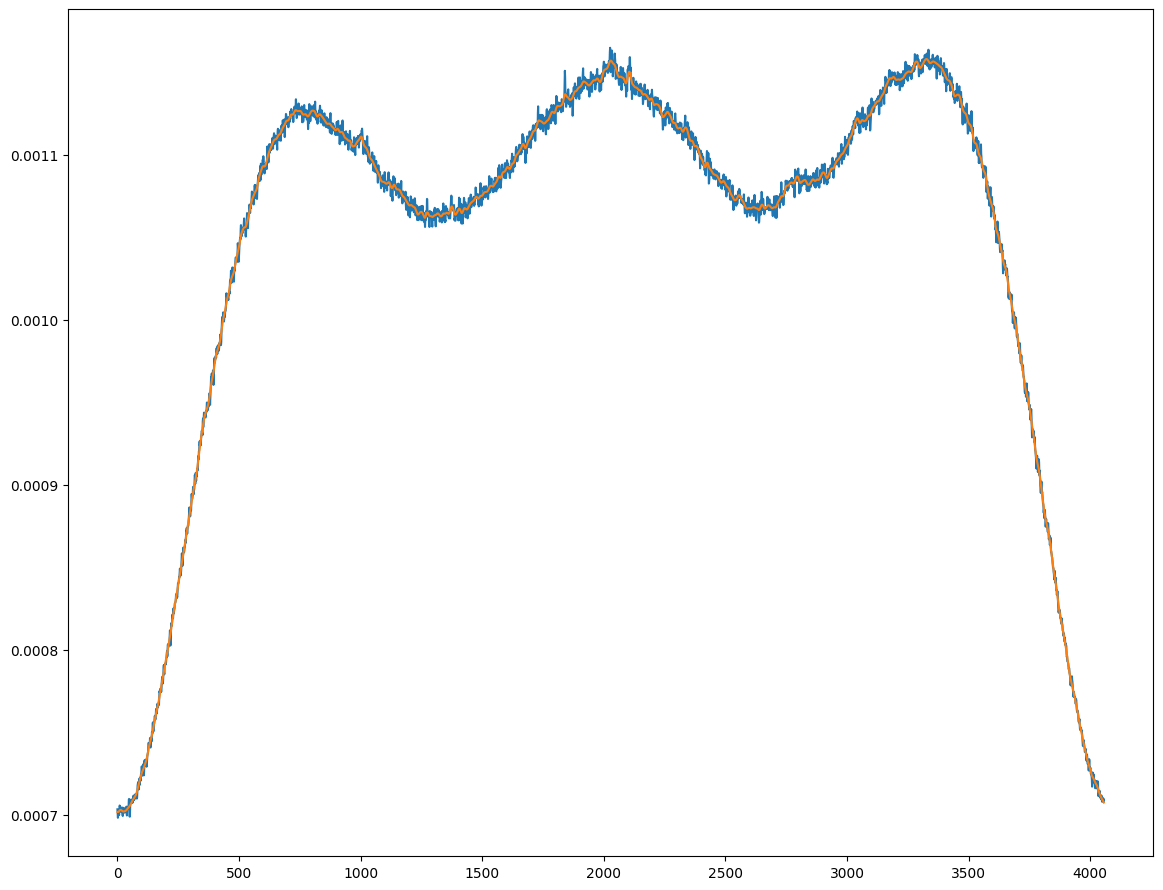

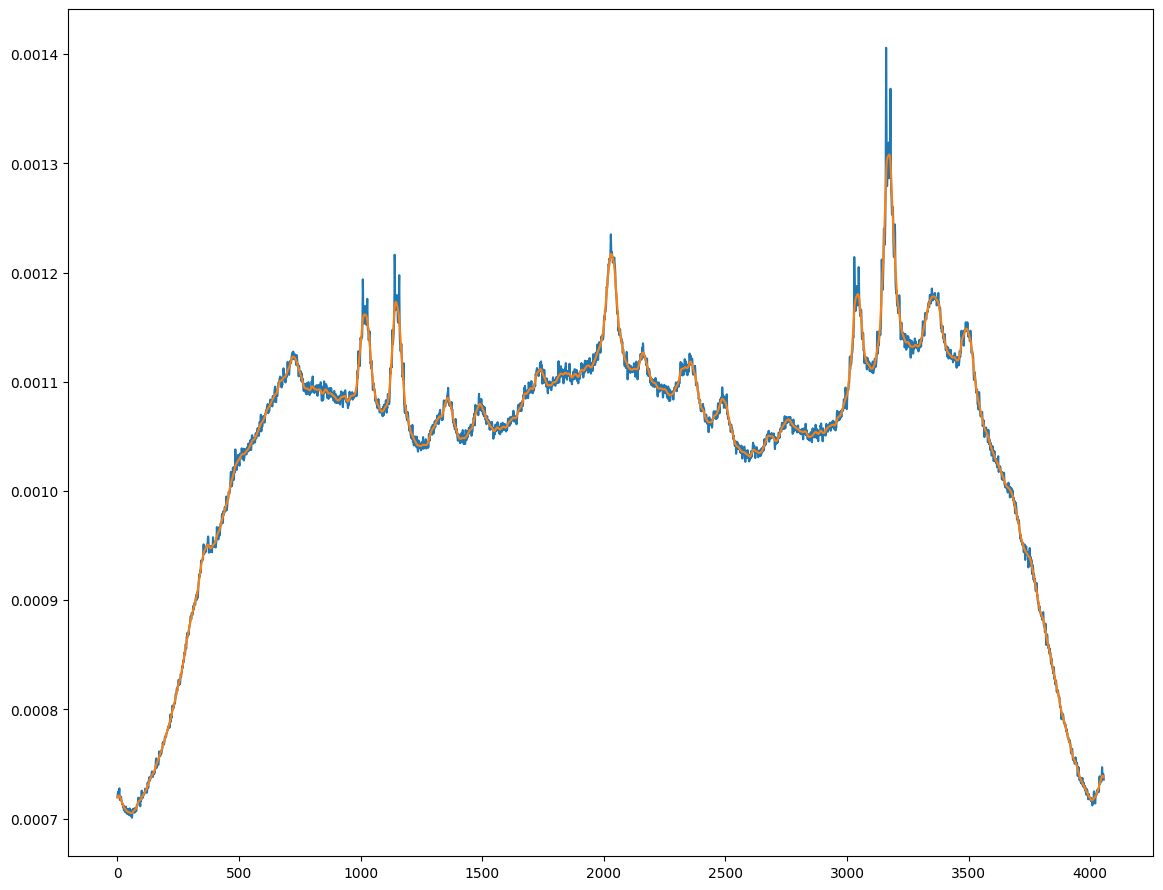

In [3]:
# baseline

sdr1_bl = read_file('/home/jiomer/Documents/observation/data/single/','2023-04-08-18:39:49_SDR1-bl.txt',60)
sdr2_bl = read_file('/home/jiomer/Documents/observation/data/single/','2023-04-08-18:39:49_SDR2-bl.txt',60)

gauss_kernel = Gaussian1DKernel(5)
smoothed_baseline1 = convolve(sdr1_bl,gauss_kernel)
smoothed_baseline2 = convolve(sdr2_bl,gauss_kernel)

plt.figure(figsize=(14,11))
plt.plot(sdr1_bl[20:-19])
plt.plot(smoothed_baseline1[20:-19])
plt.show()


plt.figure(figsize=(14,11))
plt.plot(sdr2_bl[20:-19])
plt.plot(smoothed_baseline2[20:-19])
plt.show()

In [4]:
folder_path = "/home/jiomer/Documents/observation/data/single/"
txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
for i in range(len(txt_files)):
    print(i,txt_files[i][47:])
    
print("\n")

config = configparser.ConfigParser()
config.read('/home/jiomer/Documents/observation/data/single/ini/2023-04-08_SDR_single_point.ini')

# get all sections
sections = config.sections()
for i in range(len(sections)):
    print(i,sections[i])

print("\n")

# get all options from a section
options = config.options(sections[0])
print(options)

print("\n")

# get options from sections
#value = config.get(sections[0],options[0])
#print(value)

0 2023-04-08-17:24:51_SDR1-bl.txt
1 2023-04-08-18:39:49_SDR1-bl.txt
2 2023-04-08-17:39:26_SDR2-data.txt
3 2023-04-08-18:47:01_SDR1-data.txt
4 2023-04-08-17:55:28_SDR1-data.txt
5 2023-04-08-17:19:48_SDR2-bl.txt
6 2023-04-08-18:14:22_SDR1-data.txt
7 2023-04-08-17:28:17_SDR1-bl.txt
8 2023-04-08-17:24:51_SDR2-bl.txt
9 2023-04-08-17:55:28_SDR2-data.txt
10 2023-04-08-18:26:11_SDR1-data.txt
11 2023-04-08-18:35:02_SDR2-bl.txt
12 2023-04-08-18:14:22_SDR2-data.txt
13 2023-04-08-18:50:59_SDR1-data.txt
14 2023-04-08-18:35:02_SDR1-bl.txt
15 2023-04-08-17:19:48_SDR1-bl.txt
16 2023-04-08-18:39:49_SDR2-bl.txt
17 2023-04-08-18:09:02_SDR1-data.txt
18 2023-04-08-18:01:52_SDR2-data.txt
19 2023-04-08-18:09:02_SDR2-data.txt
20 2023-04-08-17:39:26_SDR1-data.txt
21 2023-04-08-18:26:11_SDR2-data.txt
22 2023-04-08-18:50:59_SDR2-data.txt
23 2023-04-08-18:01:52_SDR1-data.txt
24 2023-04-08-18:47:01_SDR2-data.txt
25 2023-04-08-17:28:17_SDR2-bl.txt


0 SDR1-bl_17:18:47
1 SDR2-bl_17:18:47
2 SDR1-bl_17:23:15
3 SDR2-bl

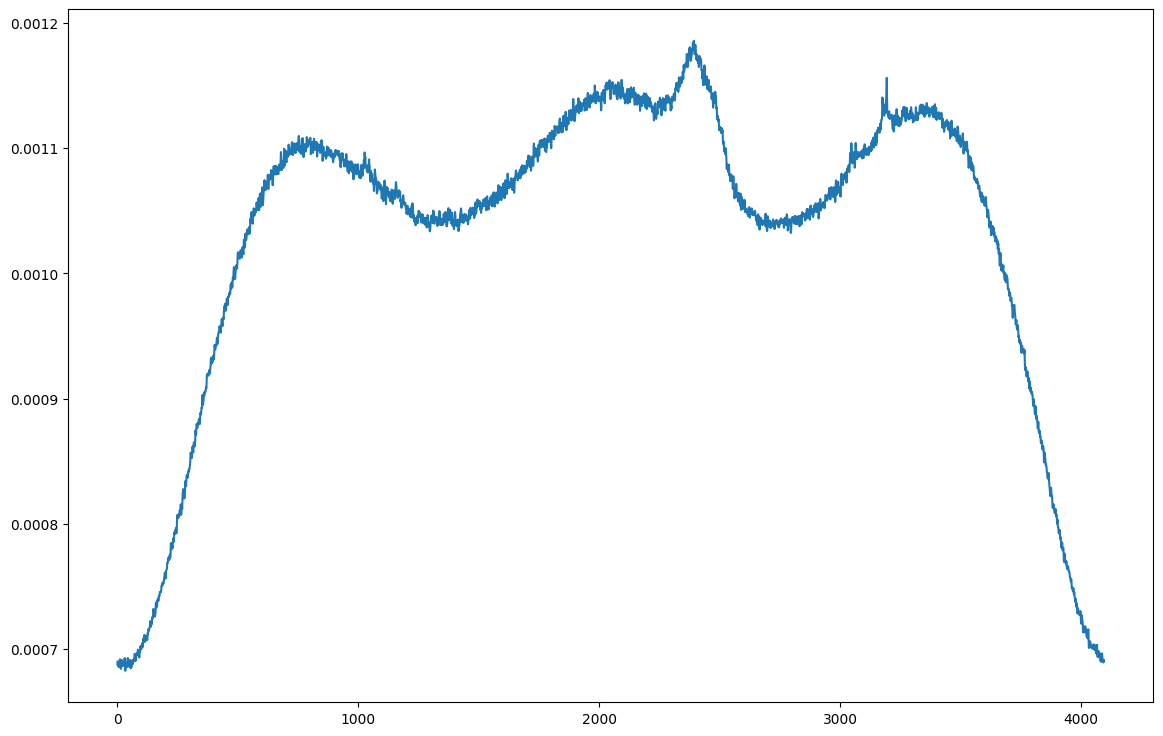

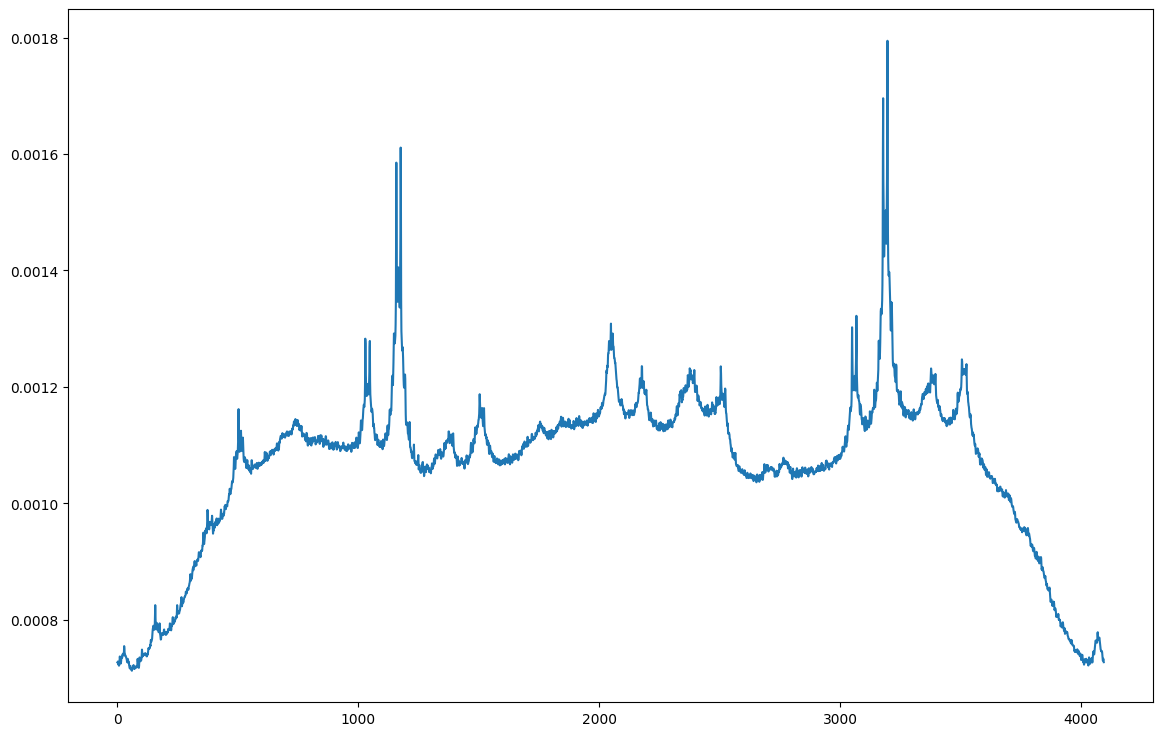

In [32]:
path = "/home/jiomer/Documents/observation/data/single/"
name1 = "2023-04-08-18:01:52_SDR1-data.txt"
name2 = "2023-04-08-18:01:52_SDR2-data.txt"
obs_time = 60
raw_spetrum1 = read_file(path,name1,obs_time)
raw_spetrum2 = read_file(path,name2,obs_time)

In [33]:
index = 10
print(sections[index])
obs_ra = config.get(sections[index],options[-2])
obs_dec = config.get(sections[index],options[-1])
print(obs_ra,obs_dec)
obslength = config.get(sections[index],options[3])
print(obslength)

cfreq = float( config.get(sections[index],options[0]) )
bandwidth = float( config.get(sections[index],options[1]) )
fftsize = int( config.get(sections[index],options[4]) )
freq_list = np.linspace( (cfreq - 0.5*bandwidth)*1e-6, (cfreq + 0.5*bandwidth)*1e-6, fftsize )

SDR1-data_18:00:22
6h28m33s -7d02m09s
60


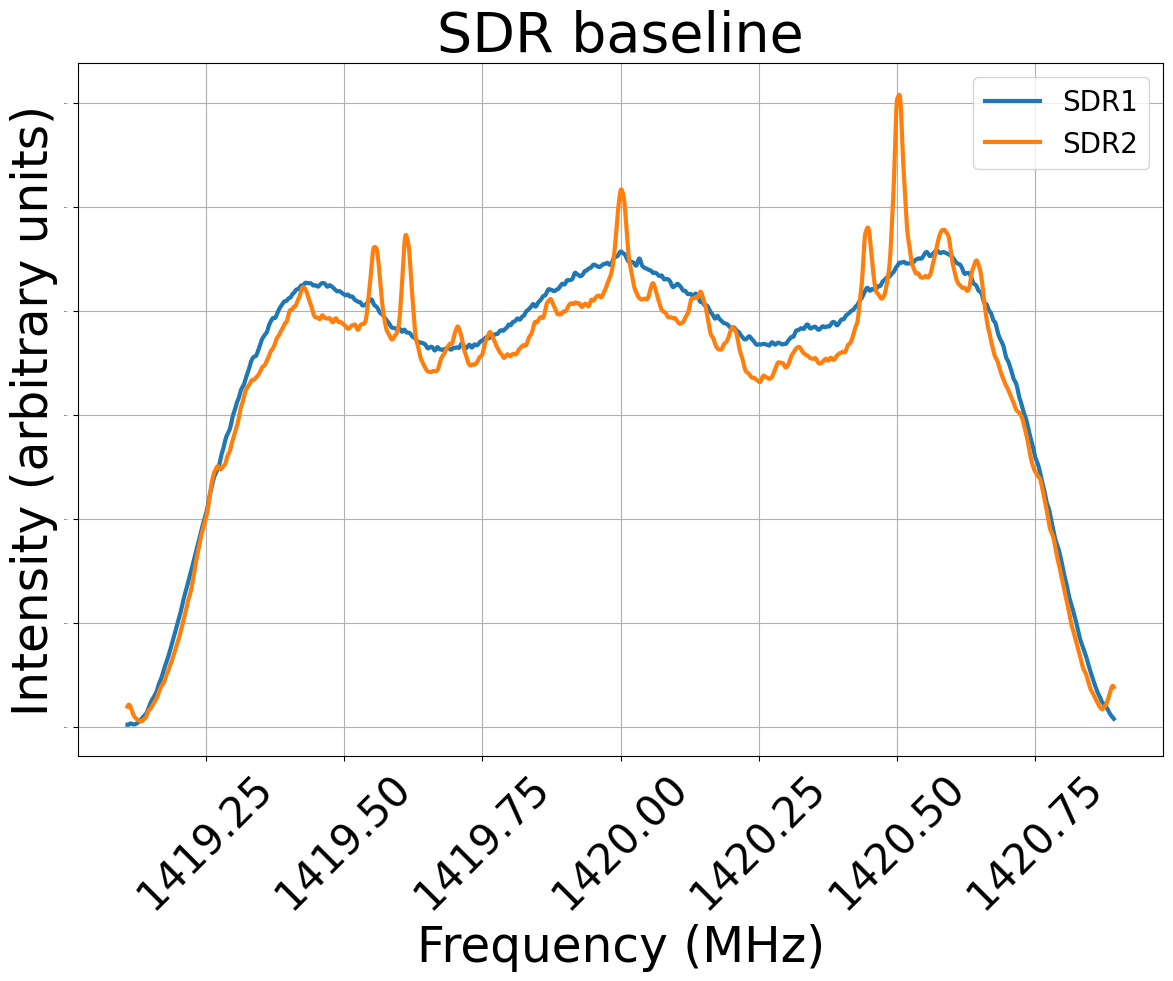

In [34]:
plt.figure(figsize=(14,9))
plt.title("SDR baseline",fontsize=40)
plt.plot(freq_list[20:-19],smoothed_baseline1[20:-19],label='SDR1',linewidth=3)
plt.plot(freq_list[20:-19],smoothed_baseline2[20:-19],label='SDR2',linewidth=3)
plt.xlabel("Frequency (MHz)",fontsize=35)
plt.ylabel("Intensity (arbitrary units)",fontsize=35)
plt.xticks(fontsize=30,rotation=45)
plt.yticks(fontsize=0)
plt.legend(fontsize=20)
plt.grid()
#plt.savefig("/home/jiomer/Documents/observation/fig/galatic/baseline.png")
plt.show()

/home/jiomer/Documents/observation/fig/galatic/SDR-data_18:00:22.png


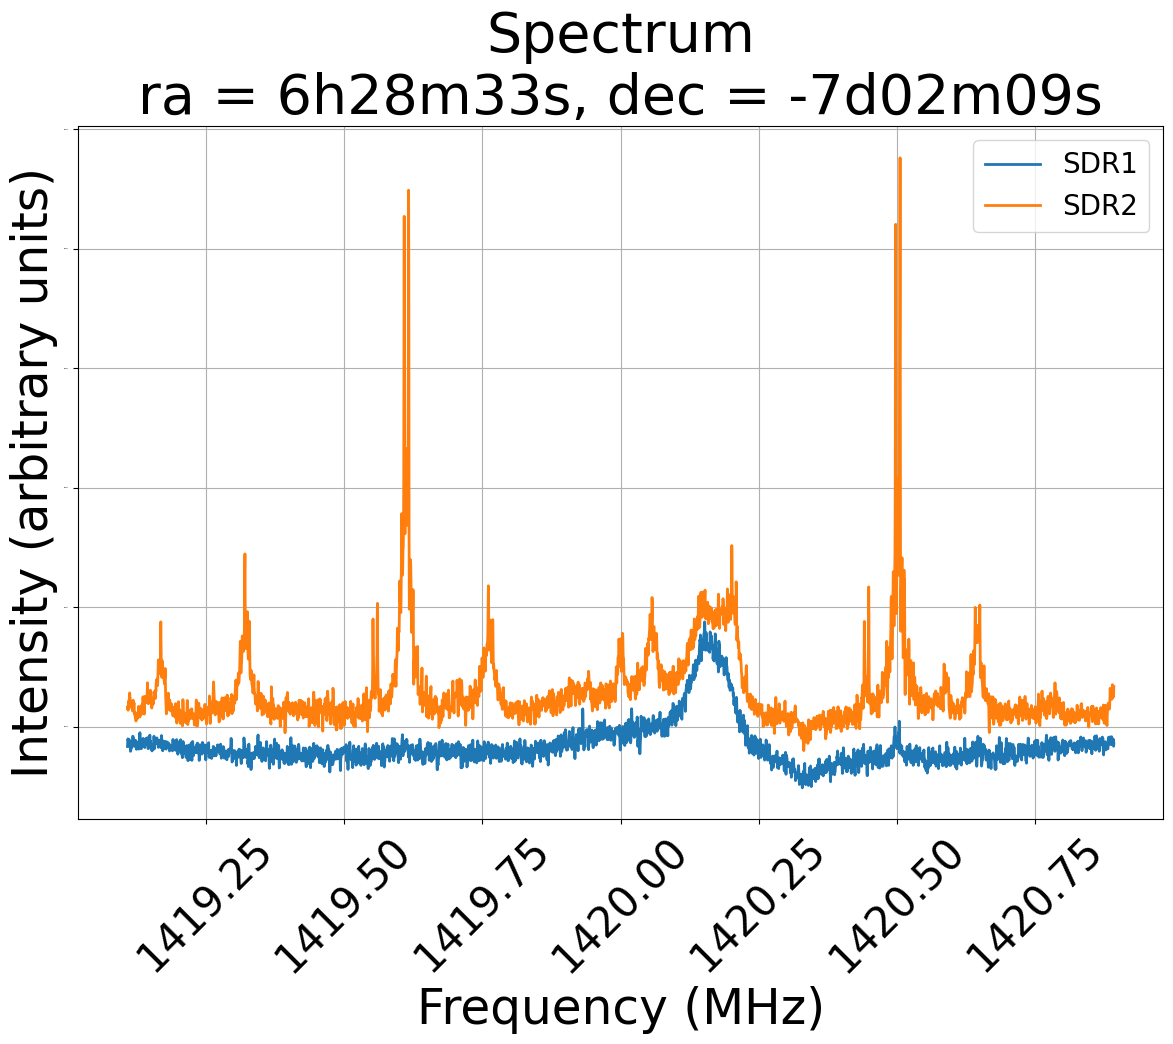

In [35]:
figname = "/home/jiomer/Documents/observation/fig/galatic/" + sections[index][:3] + sections[index][4:]+".png"
print(figname)

galatic_spetrum1 = raw_spetrum1[20:-19] - sdr1_bl[20:-19]
galatic_spetrum2 = raw_spetrum2[20:-19] - sdr2_bl[20:-19]
plt.figure(figsize=(14,9))
plt.title("Spectrum\n"+"ra = " + obs_ra + ", dec = " + obs_dec,fontsize=40)
#plt.plot(raw_spetrum)
plt.plot(freq_list[20:-19],galatic_spetrum1,label="SDR1",linewidth=2)
plt.plot(freq_list[20:-19],galatic_spetrum2,label="SDR2",linewidth=2)
plt.xlabel("Frequency (MHz)",fontsize=35)
plt.ylabel("Intensity (arbitrary units)",fontsize=35)
plt.xticks(fontsize=30,rotation=45)
plt.yticks(fontsize=0)
plt.legend(fontsize=20)
plt.grid()
#plt.savefig(figname)
plt.show()

/home/jiomer/Documents/observation/fig/galatic/SDR-data_18:00:22_speed.png


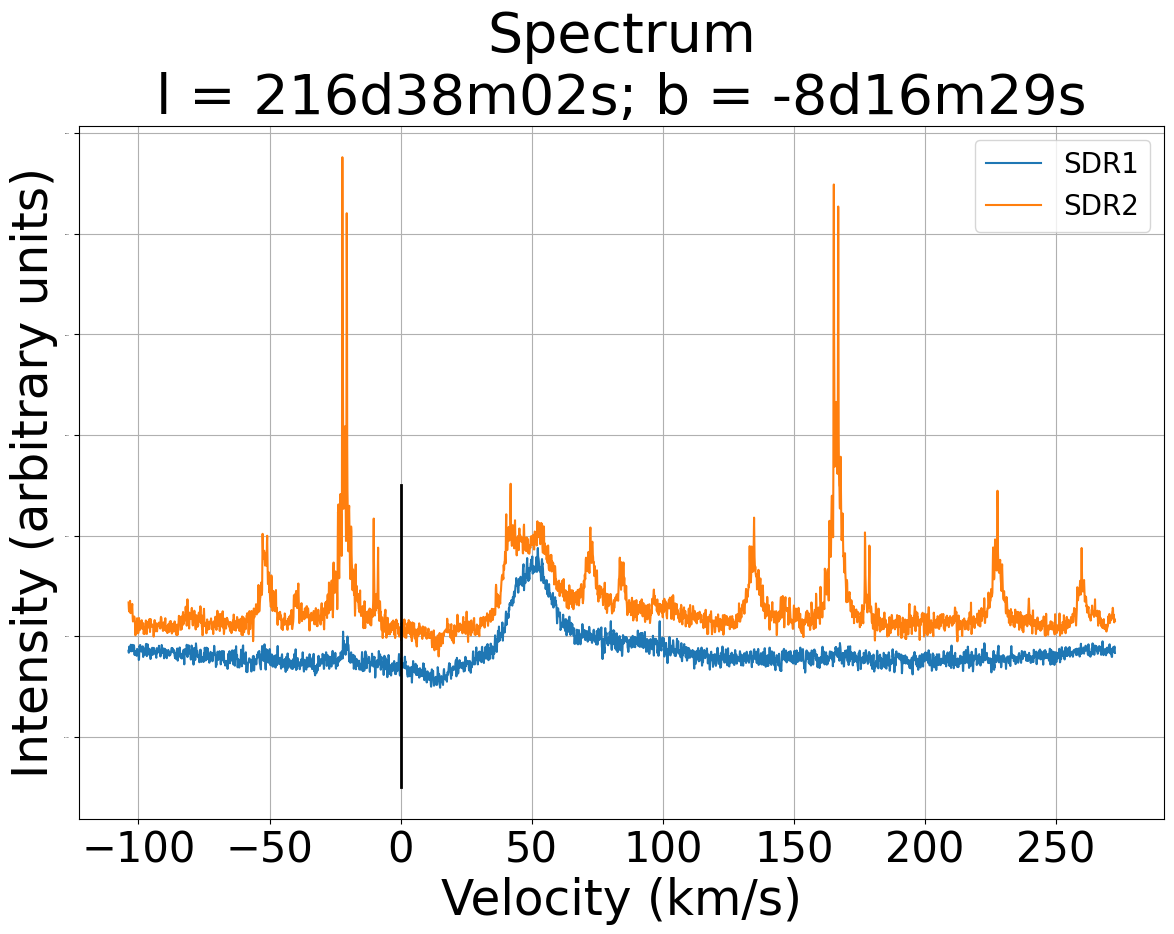

In [36]:
figname = "/home/jiomer/Documents/observation/fig/galatic/" + sections[index][:3] + sections[index][4:]+"_speed.png"
print(figname)

HI = 1420.4
lightspeed = 299792.458

vcor = 0 # km/s

c = SkyCoord(obs_ra, obs_dec, frame='icrs')
galactic = c.transform_to('galactic')

speed_list = ( HI - np.array(freq_list) )/HI*lightspeed - vcor

galatic_spetrum1 = raw_spetrum1[20:-19] - sdr1_bl[20:-19]
galatic_spetrum2 = raw_spetrum2[20:-19] - sdr2_bl[20:-19]
plt.figure(figsize=(14,9))
#plt.title("Spetrum\n"+"l = " + str(galactic.l) + "\nb = " + str(galactic.b),fontsize=20)
plt.title("Spectrum\n"+"l = " + "216d38m02s" + "; b = " + "-8d16m29s",fontsize=40)
plt.plot(speed_list[20:-19],galatic_spetrum1,label="SDR1")
plt.plot(speed_list[20:-19],galatic_spetrum2,label="SDR2")

plt.plot([0,0],[0.00015,-0.00015],c='black',linewidth=2)

plt.xlabel("Velocity (km/s)",fontsize=35)
plt.ylabel("Intensity (arbitrary units)",fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=0)
plt.legend(fontsize=20)
plt.grid()
#plt.savefig(figname)
plt.show()

/home/jiomer/Documents/observation/fig/galatic/SDR-data_18:00:22_speed_vcorr.png
25.067519959228427 km / s
42.15312779977466 km / s


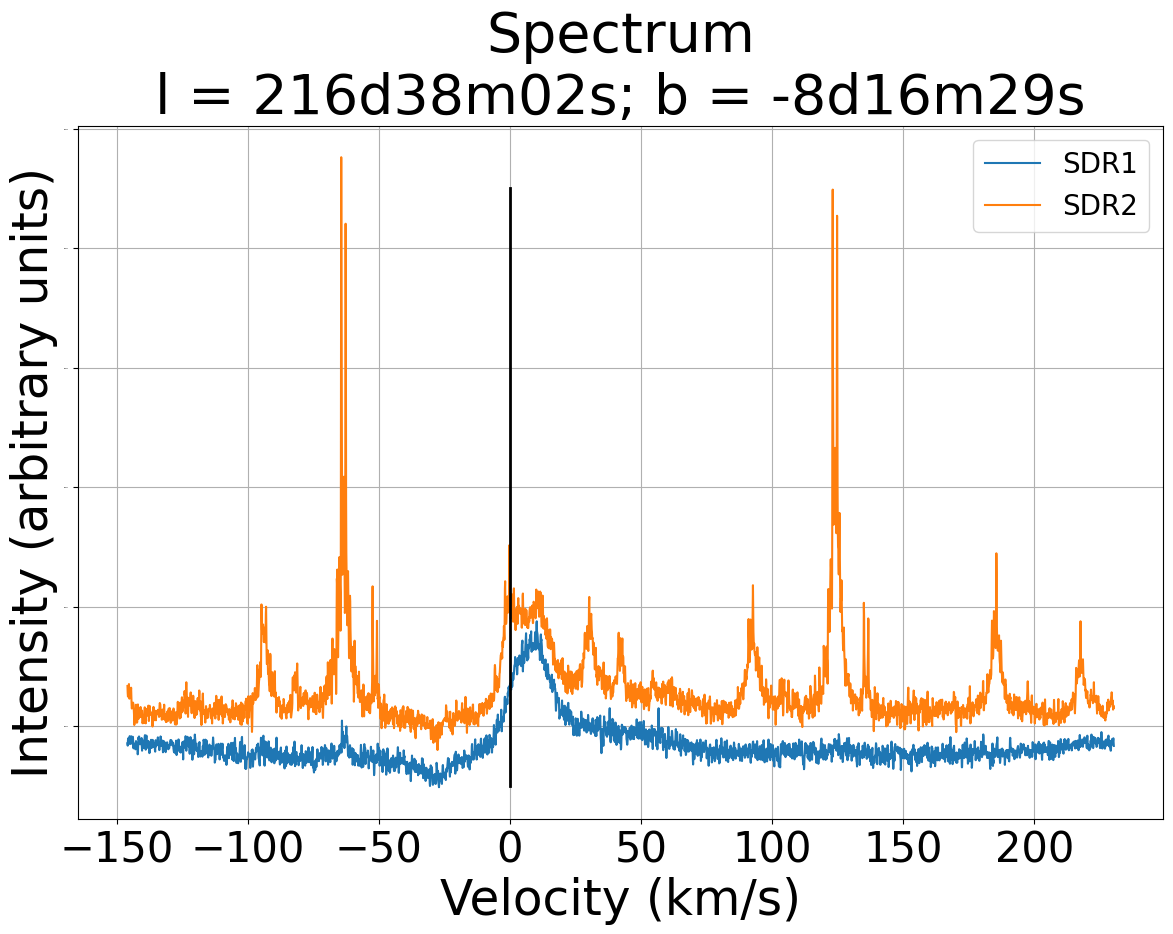

In [41]:
figname = "/home/jiomer/Documents/observation/fig/galatic/" + sections[index][:3] + sections[index][4:]+"_speed_vcorr.png"
print(figname)

HI = 1420.4
lightspeed = 299792.458

# Define RV of 0 km/s
rv = 0 * u.km / u.s  
mjd = Time(name1[:10]+' '+name1[11:19]).mjd
t = Time(mjd, format='mjd', scale='utc')
loc = EarthLocation(-70.91*u.deg,42.42*u.deg,100*u.m)
sc = SkyCoord(ra=obs_ra, dec=obs_dec)
vcorr = sc.radial_velocity_correction(kind='barycentric', obstime=t, location=loc)  
rv = rv + vcorr #+ rv * vcorr / c  
print(-rv)
my_observation = ICRS(ra=obs_ra, dec=obs_dec, \
     pm_ra_cosdec=0*u.mas/u.yr, pm_dec=0*u.mas/u.yr, \
     radial_velocity=rv, distance = 1*u.pc)
vcor = -my_observation.transform_to(LSR()).radial_velocity
print(vcor)

c = SkyCoord(obs_ra, obs_dec, frame='icrs')
galactic = c.transform_to('galactic')

speed_list = ( HI - np.array(freq_list) )/HI*lightspeed - vcor.value

galatic_spetrum1 = raw_spetrum1[20:-19] - sdr1_bl[20:-19]
galatic_spetrum2 = raw_spetrum2[20:-19] - sdr2_bl[20:-19]
plt.figure(figsize=(14,9))
#plt.title("Spetrum\n"+"l = " + str(galactic.l) + "\nb = " + str(galactic.b),fontsize=20)
plt.title("Spectrum\n"+"l = " + "216d38m02s" + "; b = " + "-8d16m29s",fontsize=40)
plt.plot(speed_list[20:-19],galatic_spetrum1,label="SDR1")
plt.plot(speed_list[20:-19],galatic_spetrum2,label="SDR2")

plt.plot([0,0],[0.00045,-0.00005],c='black',linewidth=2)

plt.xlabel("Velocity (km/s)",fontsize=35)
plt.ylabel("Intensity (arbitrary units)",fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=0)
plt.legend(fontsize=20)
plt.grid()
#plt.savefig(figname)
plt.show()

/home/jiomer/Documents/observation/fig/galatic/raw/SDR-data_18:00:22_raw.png


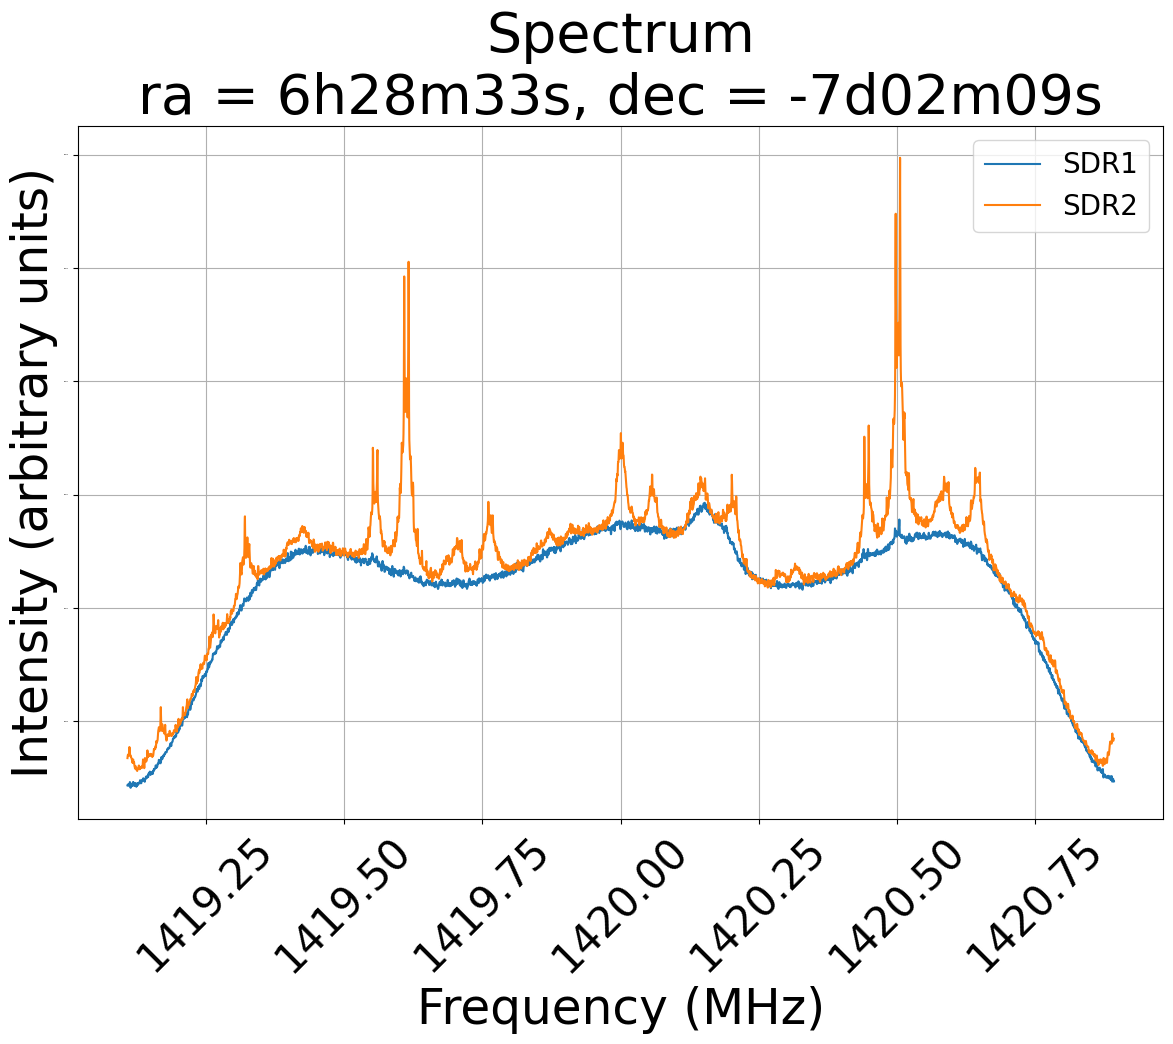

In [10]:
figname = "/home/jiomer/Documents/observation/fig/galatic/raw/" + sections[index][:3] + sections[index][4:]+"_raw.png"
print(figname)

galatic_spetrum1 = raw_spetrum1[20:-19]
galatic_spetrum2 = raw_spetrum2[20:-19]
plt.figure(figsize=(14,9))
plt.title("Spectrum\n"+"ra = " + ra + ", dec = " + dec,fontsize=40)
#plt.plot(raw_spetrum)
plt.plot(freq_list[20:-19],galatic_spetrum1,label="SDR1")
plt.plot(freq_list[20:-19],galatic_spetrum2,label="SDR2")
plt.xlabel("Frequency (MHz)",fontsize=35)
plt.ylabel("Intensity (arbitrary units)",fontsize=35)
plt.xticks(fontsize=30,rotation=45)
plt.yticks(fontsize=0)
plt.legend(fontsize=20)
plt.grid()
#plt.savefig(figname)
plt.show()